<a href="https://colab.research.google.com/github/Shalu-Yadav0811/Car-Price-Prediction/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [37]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00


In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import streamlit as st
import shap

Data Collection and Processing

In [4]:
# Loading the data from csv file to pandas DataFrame
car_dataset = pd.read_csv('/content/Car Details.csv')

In [5]:
# Inspecting the first 5 rows of the dataframe
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
# Checking the number of rows and columns
car_dataset.shape

(4340, 8)

In [7]:
# Getting some information about the Dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [8]:
# Checking the number of missing values
car_dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [9]:
# Checking the distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


Encoding the Categorical Data

In [10]:
# Encoding "fuel" column
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)

# Encoding "seller_type" column
car_dataset.replace({'seller_type':{'Individual':0,'Dealer':1}},inplace=True)

# Encoding "transmission" column
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

# Encoding "owner" column
car_dataset.replace({'owner':{'Test Drive Car':0,'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4}},inplace=True)

<ipython-input-10-ffe1772fb004>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
<ipython-input-10-ffe1772fb004>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
<ipython-input-10-ffe1772fb004>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_ob

In [11]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,1
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,2


Splitting the data into Training data and Test data

In [12]:
X = car_dataset.drop(columns=['name','selling_price'],axis=1)
Y = car_dataset['selling_price']

In [13]:
print(X)

      year  km_driven  fuel seller_type  transmission  owner
0     2007      70000     0           0             0      1
1     2007      50000     0           0             0      1
2     2012     100000     1           0             0      1
3     2017      46000     0           0             0      1
4     2014     141000     1           0             0      2
...    ...        ...   ...         ...           ...    ...
4335  2014      80000     1           0             0      2
4336  2014      80000     1           0             0      2
4337  2009      83000     0           0             0      2
4338  2016      90000     1           0             0      1
4339  2016      40000     0           0             0      1

[4340 rows x 6 columns]


In [14]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


Splitting the data and Target

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [16]:
print(X_train)

      year  km_driven  fuel seller_type  transmission  owner
3581  2017      70000     1           0             0      1
4191  2012      72000     1           1             0      1
2450  2017      40000     0           0             1      1
984   2014      70000     1           0             0      1
3546  2018      35000     0           0             0      1
...    ...        ...   ...         ...           ...    ...
3335  2018      32000     0           0             0      1
1099  2014     110000     1           0             0      1
2514  2013      50000     1           0             0      1
3606  2010      70000     1           0             0      1
2575  2017      15000     0           1             0      2

[3472 rows x 6 columns]


In [17]:
print(Y_train)

3581    720000
4191    565000
2450    500000
984     325000
3546    300000
         ...  
3335    500000
1099    520000
2514    420000
3606    300000
2575    210000
Name: selling_price, Length: 3472, dtype: int64


In [18]:
print(X_test)

      year  km_driven  fuel seller_type  transmission  owner
1149  2016      30000     0           1             0      1
2245  2017      10510     0           1             1      1
4261  2006     100000     1           0             0      2
2865  2014     130000     1           0             1      1
3110  2018      60000     1           0             0      1
...    ...        ...   ...         ...           ...    ...
2168  2009      66778     1           0             0      1
3783  2008      70000     0           0             1      3
1683  2015      73000     1           0             0      3
2420  2018      21302     0           0             0      1
3354  2018      20000     0           0             0      1

[868 rows x 6 columns]


In [19]:
print(Y_test)

1149     625000
2245     520000
4261     115999
2865    2000000
3110     707000
         ...   
2168     100000
3783     650000
1683     430000
2420     100000
3354     300000
Name: selling_price, Length: 868, dtype: int64


Models Used for Training

1. Linear Regression Model
2. Logistic Regression Model

In [20]:
print(X_train.dtypes)  # Check column data types

year             int64
km_driven        int64
fuel             int64
seller_type     object
transmission     int64
owner            int64
dtype: object


In [21]:
X_train = X_train.select_dtypes(include=['number'])  # Keep only numeric columns
X_test = X_test.select_dtypes(include=['number'])

In [22]:
# Loading the Linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [23]:
# prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [24]:
# R square Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.4233979052914303


Visualize the accuracy prices and Predicted prices

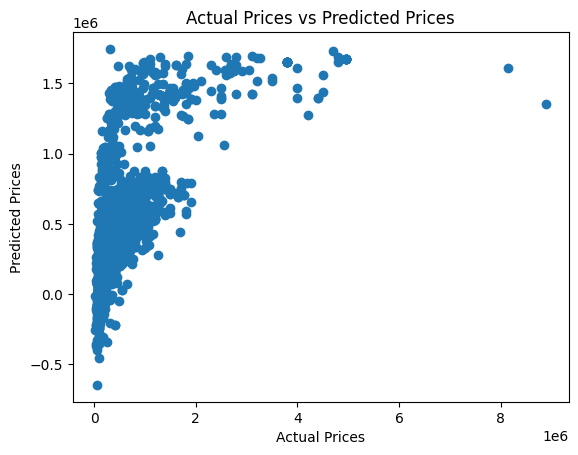

In [25]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [26]:
# prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [27]:
# R square Error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.48543668756367697


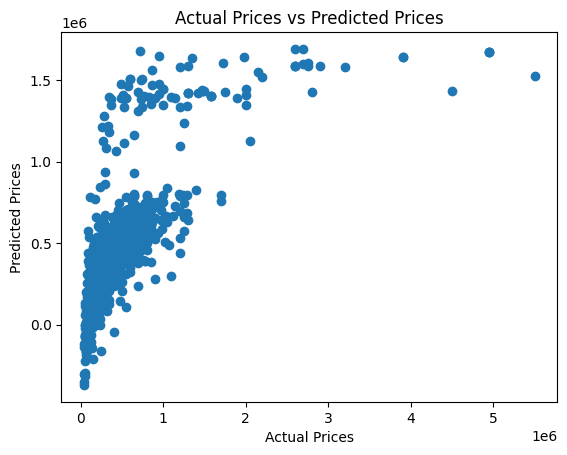

In [28]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Lasso Regression

In [29]:
# Loading the Lasso regression model
lasso_reg_model = Lasso()
lasso_reg_model.fit(X_train,Y_train)

Lasso()

In [30]:
# prediction on training data
training_data_prediction = lasso_reg_model.predict(X_train)

In [31]:
# R square Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.4233979052420571


Visualize the accuracy prices and Predicted prices

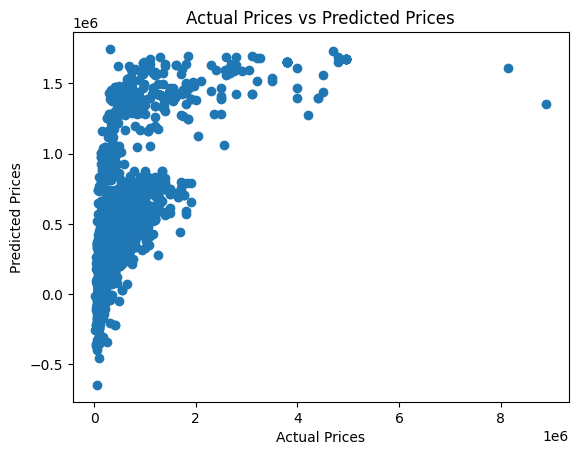

In [32]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [33]:
# prediction on test data
test_data_prediction = lasso_reg_model.predict(X_test)

In [34]:
# R square Error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.4854363883270102


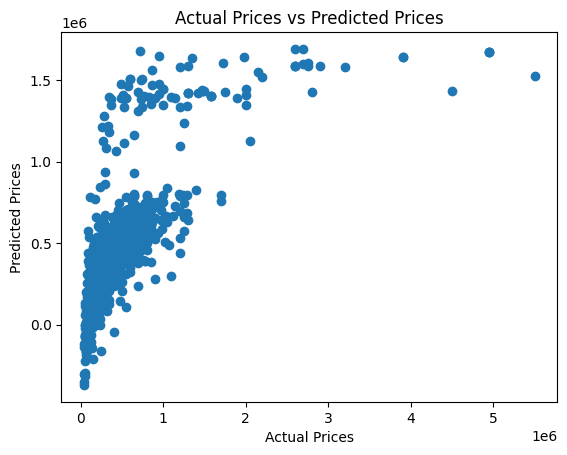

In [35]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [39]:
# Feature Engineering
car_dataset["car_age"] = 2025 - car_dataset["year"]  # Calculate car age
car_dataset = car_dataset.drop(["year"], axis=1)  # Drop year after extracting age
car_dataset = car_dataset[car_dataset["km_driven"] < car_dataset["km_driven"].quantile(0.99)]  # Remove outliers

In [40]:
# Log transform
for col in ["selling_price", "km_driven"]:
    car_dataset[col] = np.log1p(car_dataset[col])

In [41]:
# Define categorical & numerical features
num_features = ["km_driven", "car_age"]
cat_features = ["fuel", "seller_type", "transmission", "owner"]

In [42]:
# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

In [43]:
# Train-test split
X = car_dataset.drop("selling_price", axis=1)
y = car_dataset["selling_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

In [50]:
results = {}

In [53]:
print(X_train.dtypes)

name             object
km_driven       float64
fuel              int64
seller_type      object
transmission      int64
owner             int64
car_age           int64
dtype: object


In [54]:
# Convert categorical columns to string type
cat_features = ["fuel", "seller_type", "transmission", "owner"]

for col in cat_features:
    car_dataset[col] = car_dataset[col].astype(str)

In [55]:
# Split data again after conversion
X = car_dataset.drop("selling_price", axis=1)
y = car_dataset["selling_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    results[name] = {
        "R2 Score": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred)
    }

In [57]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

                   R2 Score      RMSE       MAE
Linear Regression  0.670785  0.481149  0.362378
Lasso Regression   0.487021  0.600607  0.436765
Random Forest      0.705488  0.455084  0.324055
XGBoost            0.724435  0.440202  0.320713


 94%|=================== | 472/500 [00:20<00:01]       

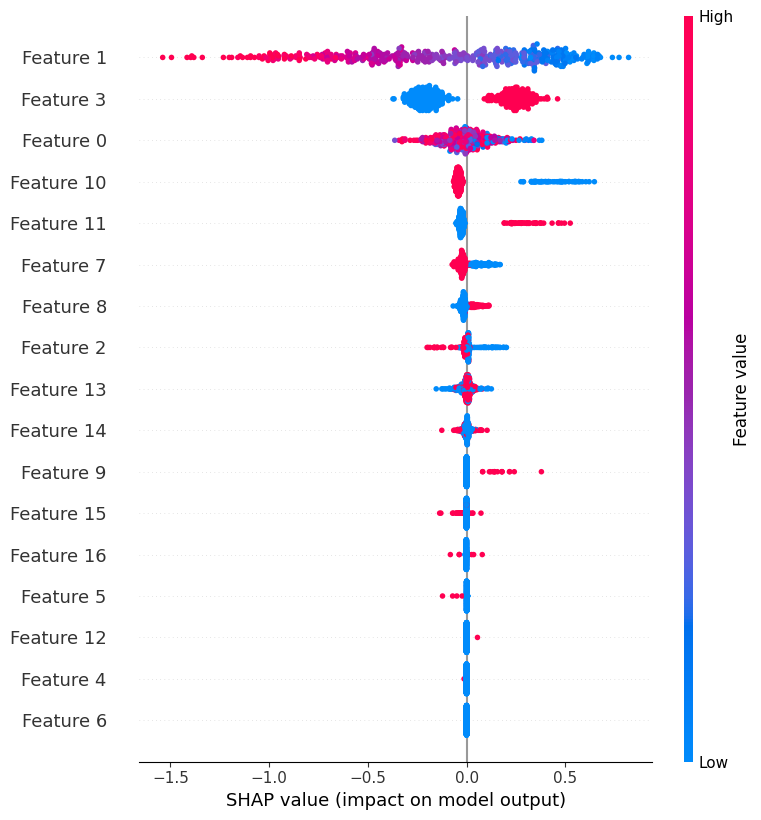

In [59]:
sample_size = 500  # Adjust based on performance
X_sample = X_train_transformed[:sample_size]

explainer = shap.Explainer(rf_model, X_sample)
shap_values = explainer(X_sample)  # Only calculate for subset
shap.summary_plot(shap_values, X_sample)

In [63]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_transformed, y_train)

RandomForestRegressor(random_state=42)

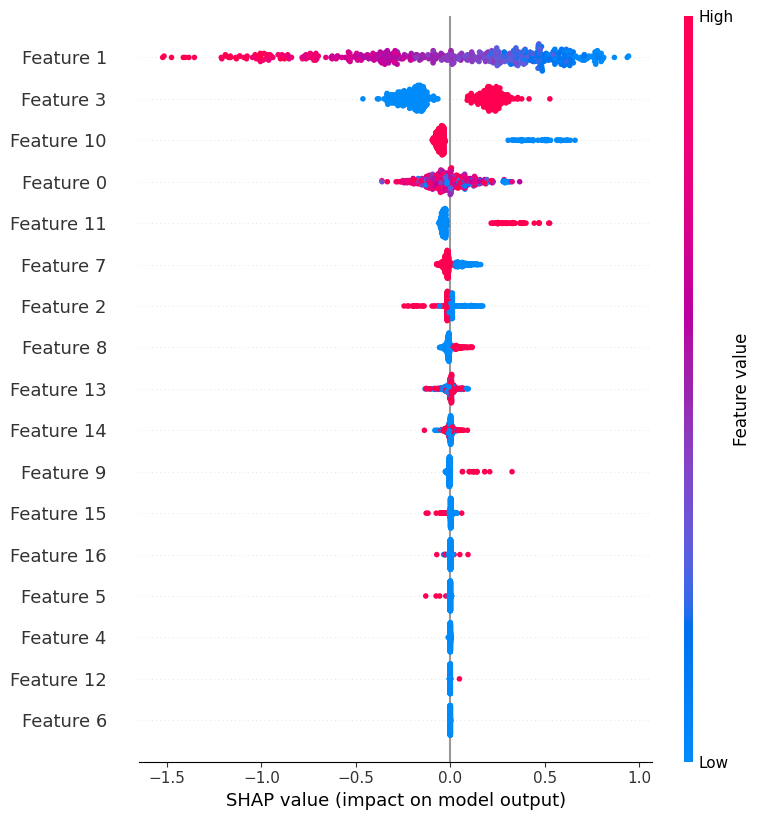

In [64]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train_transformed[:500])  # Limit sample size
shap.summary_plot(shap_values, X_train_transformed[:500])

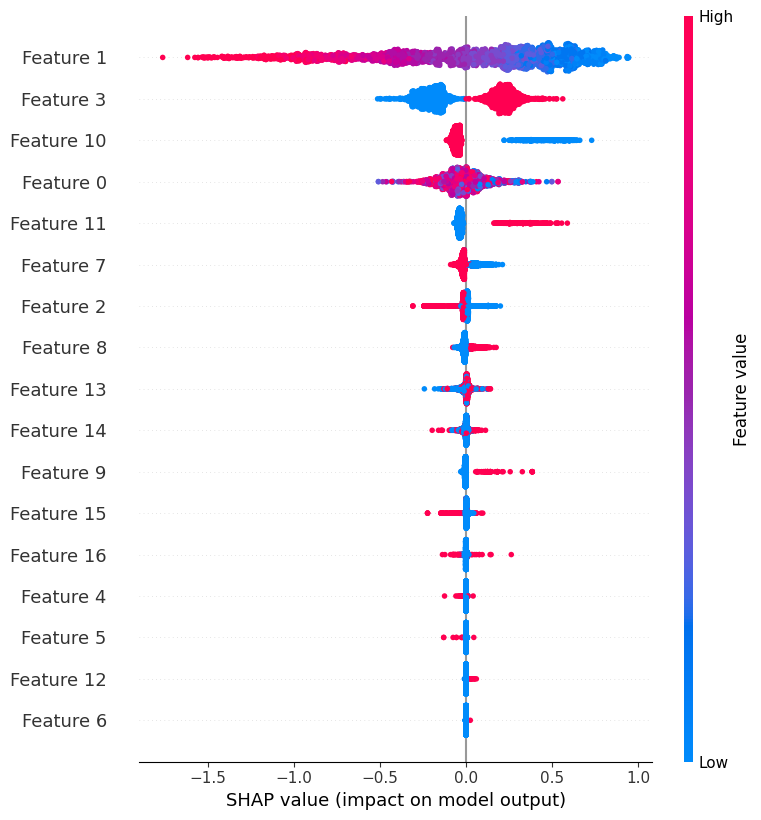

In [66]:
# Feature Importance (SHAP for Random Forest)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
X_train_transformed = preprocessor.fit_transform(X_train)
rf_model.fit(X_train_transformed, y_train)
explainer = shap.Explainer(rf_model)
shap_values = explainer(X_train_transformed)
shap.summary_plot(shap_values, X_train_transformed)

In [67]:
# Streamlit Web App
def predict_price(km_driven, car_age, fuel, seller_type, transmission, owner):
    input_data = pd.DataFrame([[km_driven, car_age, fuel, seller_type, transmission, owner]],
                              columns=X.columns)
    input_transformed = preprocessor.transform(input_data)
    price = rf_model.predict(input_transformed)[0]
    return np.exp(price)  # Convert back from log scale

In [68]:
st.title("Car Price Prediction")
km_driven = st.number_input("Kilometers Driven", min_value=0)
car_age = st.number_input("Car Age", min_value=0)
fuel = st.selectbox("Fuel Type", car_dataset["fuel"].unique())
seller_type = st.selectbox("Seller Type", car_dataset["seller_type"].unique())
transmission = st.selectbox("Transmission", car_dataset["transmission"].unique())
owner = st.selectbox("Owner", car_dataset["owner"].unique())

2025-03-25 05:16:25.727 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 05:16:25.826 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-25 05:16:25.828 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 05:16:25.829 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 05:16:25.831 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 05:16:25.832 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 05:16:25.834 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 05:16:25.835 Session state does not 

In [69]:
if st.button("Predict Price"):
    price = predict_price(km_driven, car_age, fuel, seller_type, transmission, owner)
    st.write(f"Estimated Selling Price: ₹{round(price, 2)}")

2025-03-25 05:16:27.364 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 05:16:27.365 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 05:16:27.366 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 05:16:27.367 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 05:16:27.367 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
